# Segementación de imágenes

La segmentación de imágenes es un proceso fundamental en el procesamiento digital de imágenes, cuyo objetivo es dividir una imagen en regiones o segmentos que comparten características similares. Estos segmentos pueden representar diferentes objetos, formas, texturas o áreas de interés dentro de la imagen.

## Segmentación Basada en Textura

### ¿Qué es la textura en imágenes?
La textura en una imagen describe patrones repetitivos de variaciones en intensidad o color que forman una representación visual de las características de una superficie. Es un atributo clave que nos permite distinguir objetos que pueden tener colores o intensidades similares pero diferentes apariencias debido a sus patrones superficiales. 


Ejemplos típicos incluyen superficies como el césped, ladrillos, piel animal, y más.

- __Textura uniforme__: Donde los patrones son consistentes a lo largo de una región (por ejemplo, una pared lisa).
- __Textura no uniforme__: Donde los patrones varían dentro de una región (por ejemplo, hojas de un árbol).

### Importancia de la textura en segmentación

La textura juega un papel crucial en la segmentación de imágenes cuando la información de color o intensidad no es suficiente para diferenciar las diferentes regiones. En particular, la segmentación basada en textura es útil en situaciones donde las regiones tienen colores similares pero texturas distintas. Esto es común en aplicaciones como:

- Imágenes médicas: Distinguir entre diferentes tipos de tejidos o lesiones.
- Visión por computadora: Reconocimiento de objetos en entornos complejos.
- Análisis de materiales: Identificación de defectos o características en superficies industriales.

### Técnicas Comunes para la Segmentación Basada en Textura

Existen varias técnicas para analizar y segmentar texturas en imágenes. A continuación, se presentan las más utilizadas:

- __Métodos basados en estadísticas__:
  
  Estos métodos utilizan información estadística derivada de la imagen, como la frecuencia de aparición de ciertos patrones. Un ejemplo popular es la __Matriz de Co-ocurrencia__ de Nivel de Gris (GLCM, por sus siglas en inglés), que mide la frecuencia con la que ciertos pares de píxeles, con intensidades específicas, aparecen en una imagen a una distancia determinada.
  - __Matriz de Co-ocurrencia de Nivel de Gris (GLCM)__:
    
    Esta técnica cuantifica cómo cambian los valores de intensidad de los píxeles en diferentes direcciones y distancias dentro de una imagen. Permite calcular características como:

    - __Contraste__: La diferencia entre los niveles de gris adyacentes.
    - __Homogeneidad__: Qué tan homogénea es una región.
    - __Energía y Entropía__: Qué tan caótica o uniforme es la textura en una región.

  - Filtros de Gabor:
    
  Los filtros de Gabor son una técnica popular para la detección de texturas. Estos filtros se utilizan para extraer información de las frecuencias espaciales en diferentes orientaciones. Los filtros de Gabor son muy eficaces para analizar texturas que tienen una orientación y frecuencia específicas, como patrones lineales o periódicos.
    - __Ventaja de los Filtros de Gabor__: 
    
    
    Pueden detectar texturas en múltiples orientaciones y escalas, lo que los hace útiles para distinguir patrones complejos y repetitivos.

  - Filtros de Laws:
  
  Los filtros de Laws son una serie de filtros de convolución diseñados para capturar diferentes tipos de texturas, como rugosidad, suavidad o granularidad. Estos filtros aplican máscaras a la imagen para detectar patrones de textura en una escala pequeña.

## Método Completo de Segmentación Basada en Textura

Un pipeline típico para segmentar una imagen basada en textura sigue estos pasos:

1) Preprocesar la imagen (por ejemplo, convertirla a escala de grises).

2) Aplicar un método de análisis de textura (GLCM, filtros de Gabor, etc.).

3) Extraer características de textura relevantes (como contraste, homogeneidad, frecuencia).

4) Aplicar un método de segmentación (como k-means o segmentación por umbral) en función de las características de textura extraídas.

In [1]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Cargar imagen en escala de grises
img = cv2.imread('rafa.jpg', cv2.IMREAD_GRAYSCALE)

# Calcular la GLCM
glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Propiedades de la textura usando GLCM
contrast = graycoprops(glcm, 'contrast')
homogeneity = graycoprops(glcm, 'homogeneity')

print(f'Contraste: {contrast}, Homogeneidad: {homogeneity}')


Contraste: [[188.45854827]], Homogeneidad: [[0.63468299]]


#### Aplicación Completa con Segmentación

Segmentación usando Transformada de Gabor

El filtro de Gabor detecta diferentes frecuencias y orientaciones de las texturas en la imagen, útil para identificar patrones texturales.

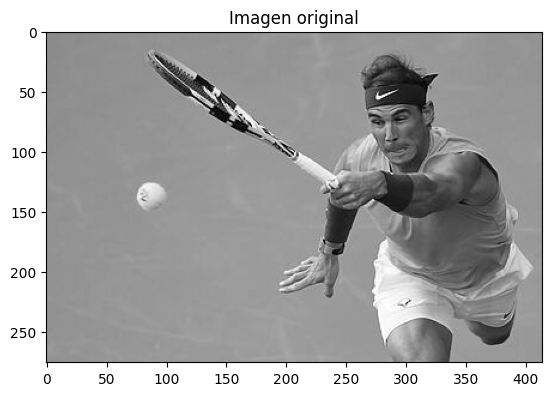

In [3]:
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()


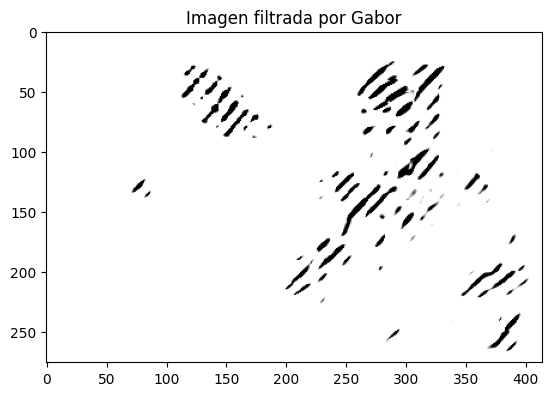

In [4]:
# Aplicar filtro de Gabor
def gabor_filter(img, ksize, sigma, theta, lambd, gamma, psi):
    g_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    return filtered_img

img_filtered = gabor_filter(img, 21, 8.0, np.pi/4, 10.0, 0.5, 0)

plt.imshow(img_filtered, cmap='gray')
plt.title('Imagen filtrada por Gabor')
plt.show()


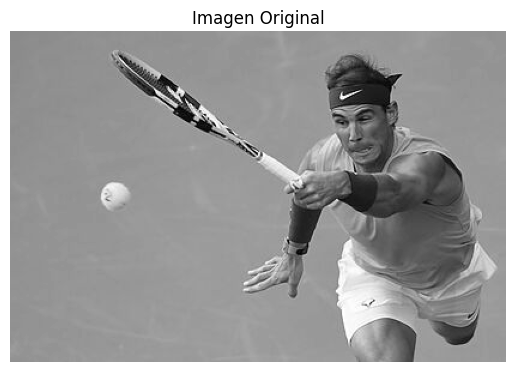

In [5]:
# Cargar la imagen en escala de grises
img = cv2.imread('rafa.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()


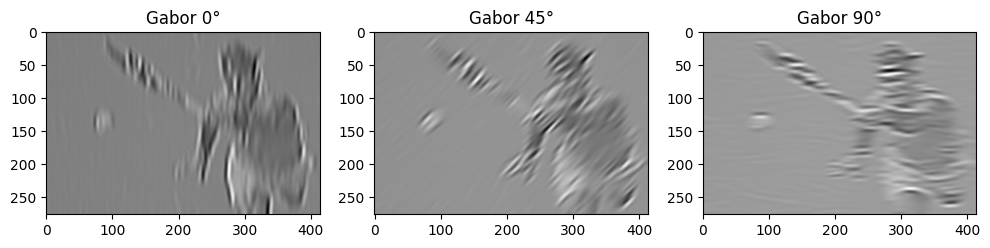

In [6]:
# Aplicar un filtro de Gabor
def gabor_filter(img, ksize, sigma, theta, lambd, gamma, psi):
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
    filtered_img = cv2.filter2D(img, cv2.CV_64F, gabor)
    return filtered_img

# Parametrizar el filtro de Gabor
ksize = 31
sigma = 4.0
lambd = 10.0
gamma = 0.5
psi = 0

# Aplicar el filtro de Gabor en diferentes ángulos
gabor_0 = gabor_filter(img, ksize, sigma, 0, lambd, gamma, psi)
gabor_45 = gabor_filter(img, ksize, sigma, np.pi/4, lambd, gamma, psi)
gabor_90 = gabor_filter(img, ksize, sigma, np.pi/2, lambd, gamma, psi)

# Mostrar los resultados
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gabor_0, cmap='gray'), plt.title('Gabor 0°')
plt.subplot(132), plt.imshow(gabor_45, cmap='gray'), plt.title('Gabor 45°')
plt.subplot(133), plt.imshow(gabor_90, cmap='gray'), plt.title('Gabor 90°')
plt.show()


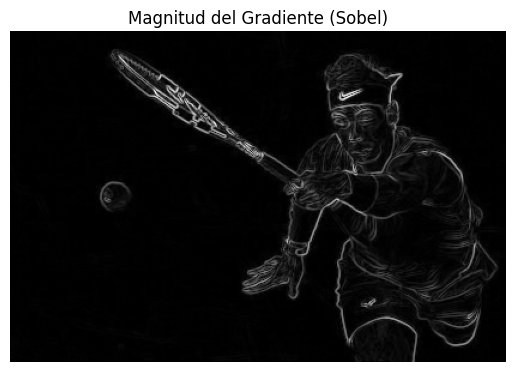

In [7]:
# Aplicar el filtro de Sobel en la imagen
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcular la magnitud del gradiente
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Mostrar el resultado del filtro de Sobel
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Magnitud del Gradiente (Sobel)')
plt.axis('off')
plt.show()


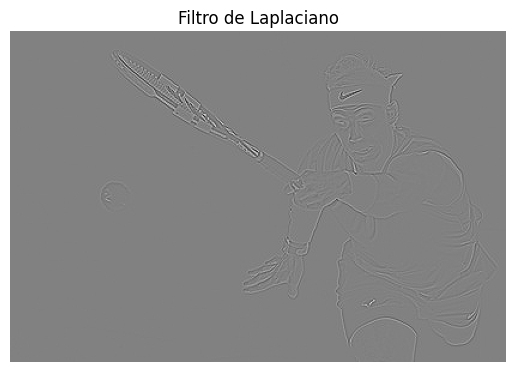

In [8]:
# Aplicar el filtro de Laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Normalizar para visualizar mejor
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)

# Mostrar el resultado del filtro de Laplaciano
plt.imshow(laplacian, cmap='gray')
plt.title('Filtro de Laplaciano')
plt.axis('off')
plt.show()


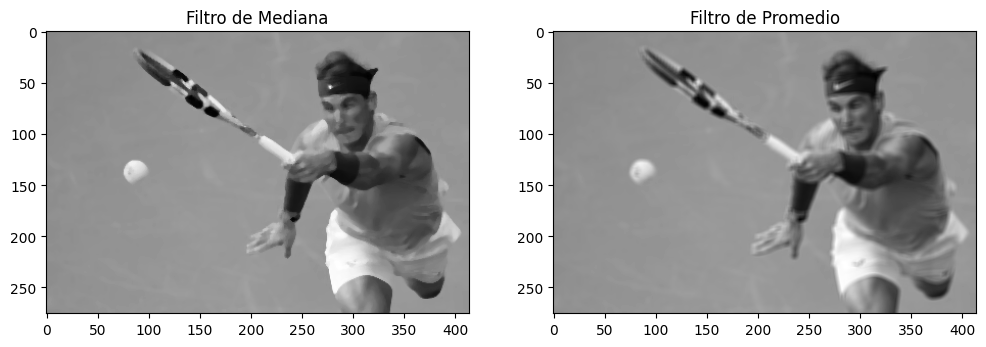

In [9]:
# Filtro de Mediana
median_filtered = cv2.medianBlur(img, 5)

# Filtro de Promedio
mean_filtered = cv2.blur(img, (5, 5))

# Mostrar resultados de los filtros de Mediana y Promedio
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(median_filtered, cmap='gray'), plt.title('Filtro de Mediana')
plt.subplot(122), plt.imshow(mean_filtered, cmap='gray'), plt.title('Filtro de Promedio')
plt.show()



In [11]:
!pip install PyWavelets

  Using cached pywavelets-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)


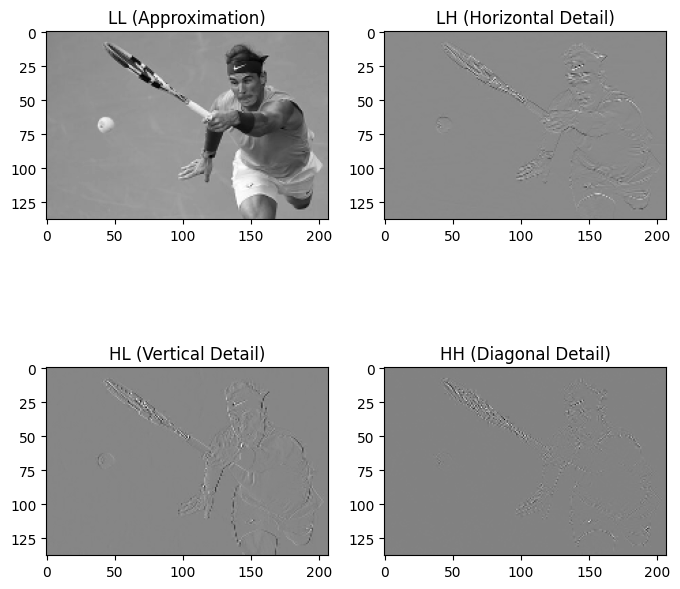

In [12]:
import pywt

# Aplicar la transformada wavelet
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Mostrar las diferentes sub-bandas
plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(LL, cmap='gray'), plt.title('LL (Approximation)')
plt.subplot(222), plt.imshow(LH, cmap='gray'), plt.title('LH (Horizontal Detail)')
plt.subplot(223), plt.imshow(HL, cmap='gray'), plt.title('HL (Vertical Detail)')
plt.subplot(224), plt.imshow(HH, cmap='gray'), plt.title('HH (Diagonal Detail)')
plt.show()


In [3]:
# Cargar imagen
image = cv2.imread('rafa.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtros de Gabor para extraer características de textura
gabor_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)

# Extraer características de GLCM (matriz de co-ocurrencia)
glcm = graycomatrix(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]

# Realizar clustering (K-Means)
features = np.column_stack((filtered_image.flatten(), contrast.flatten()))
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
segmented_image = kmeans.labels_.reshape(image.shape)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 114264 and the array at index 1 has size 1